Tasks:
Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible. Give your reasoning and code if you decide to impute missing values.
Columns for investigation: CARRIER, CARRIER_NAME, MANUFACTURE_YEAR, NUMBER_OF_SEATS, CAPACITY_IN_POUNDS, and AIRLINE_ID.
For example, watch out for "North American Airlines" aircrafts. Are the CARRIER/UNIQUE_CARRIER column really missing?
Inspect the columns MANUFACTURER, MODEL, AIRCRAFT_STATUS, and OPERATING_STATUS. Decide, for each column, if transformation or standardization of data are required. Give your reasoning and code if you decide to transform the data.
Hints:
For very messy data like manufacturer/model names, give your best attempt. It is okay to not catch them all.
Use value_counts() to identify "big wins".
Break down into multiple steps, instead of having one line of code to do them all.
Remove data rows that still have missing values. Report the amount of remaining data you obtained.
Transformation and derivative variables
For the columns NUMBER_OF_SEATS and CAPACITY_IN_POUNDS, check the skewness in the variable and plot a histogram for each variable.
The Box-Cox transformation (scipy.stats.boxcox) is one possible way to transform variables into a "more-normal-like" variable. Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. XXXXXXXXX_BOXCOX.
Plot a histogram for each transformed variable.
Describe what you observe before and after transformation.
Feature engineering
Create a new column SIZE by the quartiles of NUMBER_OF_SEATS
below 25% percentile: SMALL
25% - 50% percentile: MEDIUM
50% - 75% percentile: LARGE
above 75% percentile: XLARGE
For each size group, provide and plot the proportions of aircrafts that are operating versus not (OPERATING_STATUS).
For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (AIRCRAFT_STATUS).
Provide a written summary of your findings.


In [3]:
import pandas as pd
inventory = pd.read_csv('dataset/T_F41SCHEDULE_B43.zip')
inventory.info()

C:\Users\vDxbs\AppData\Local\Temp\ipykernel_14672\1321453169.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('dataset/T_F41SCHEDULE_B43.zip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

1) Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible. Give your reasoning and code if you decide to impute missing values.
* Columns for investigation: CARRIER, CARRIER_NAME, MANUFACTURE_YEAR, NUMBER_OF_SEATS, CAPACITY_IN_POUNDS, and AIRLINE_ID.
* For example, watch out for "North American Airlines" aircrafts. Are the CARRIER/UNIQUE_CARRIER column really missing?

In [ ]:
inventory['MODEL'].value_counts().sort_values(ascending=True)


MODEL
B757-223ER        1
B737-490COMBI     1
EMB-135LR         1
C-AT-210N         1
B737-490CARGO     1
                 ..
Challenger604     2
6011A             2
CHAL-350          2
CL6002B16-605     2
GULFSTREAMG280    2
Name: count, Length: 200, dtype: int64

<Axes: >

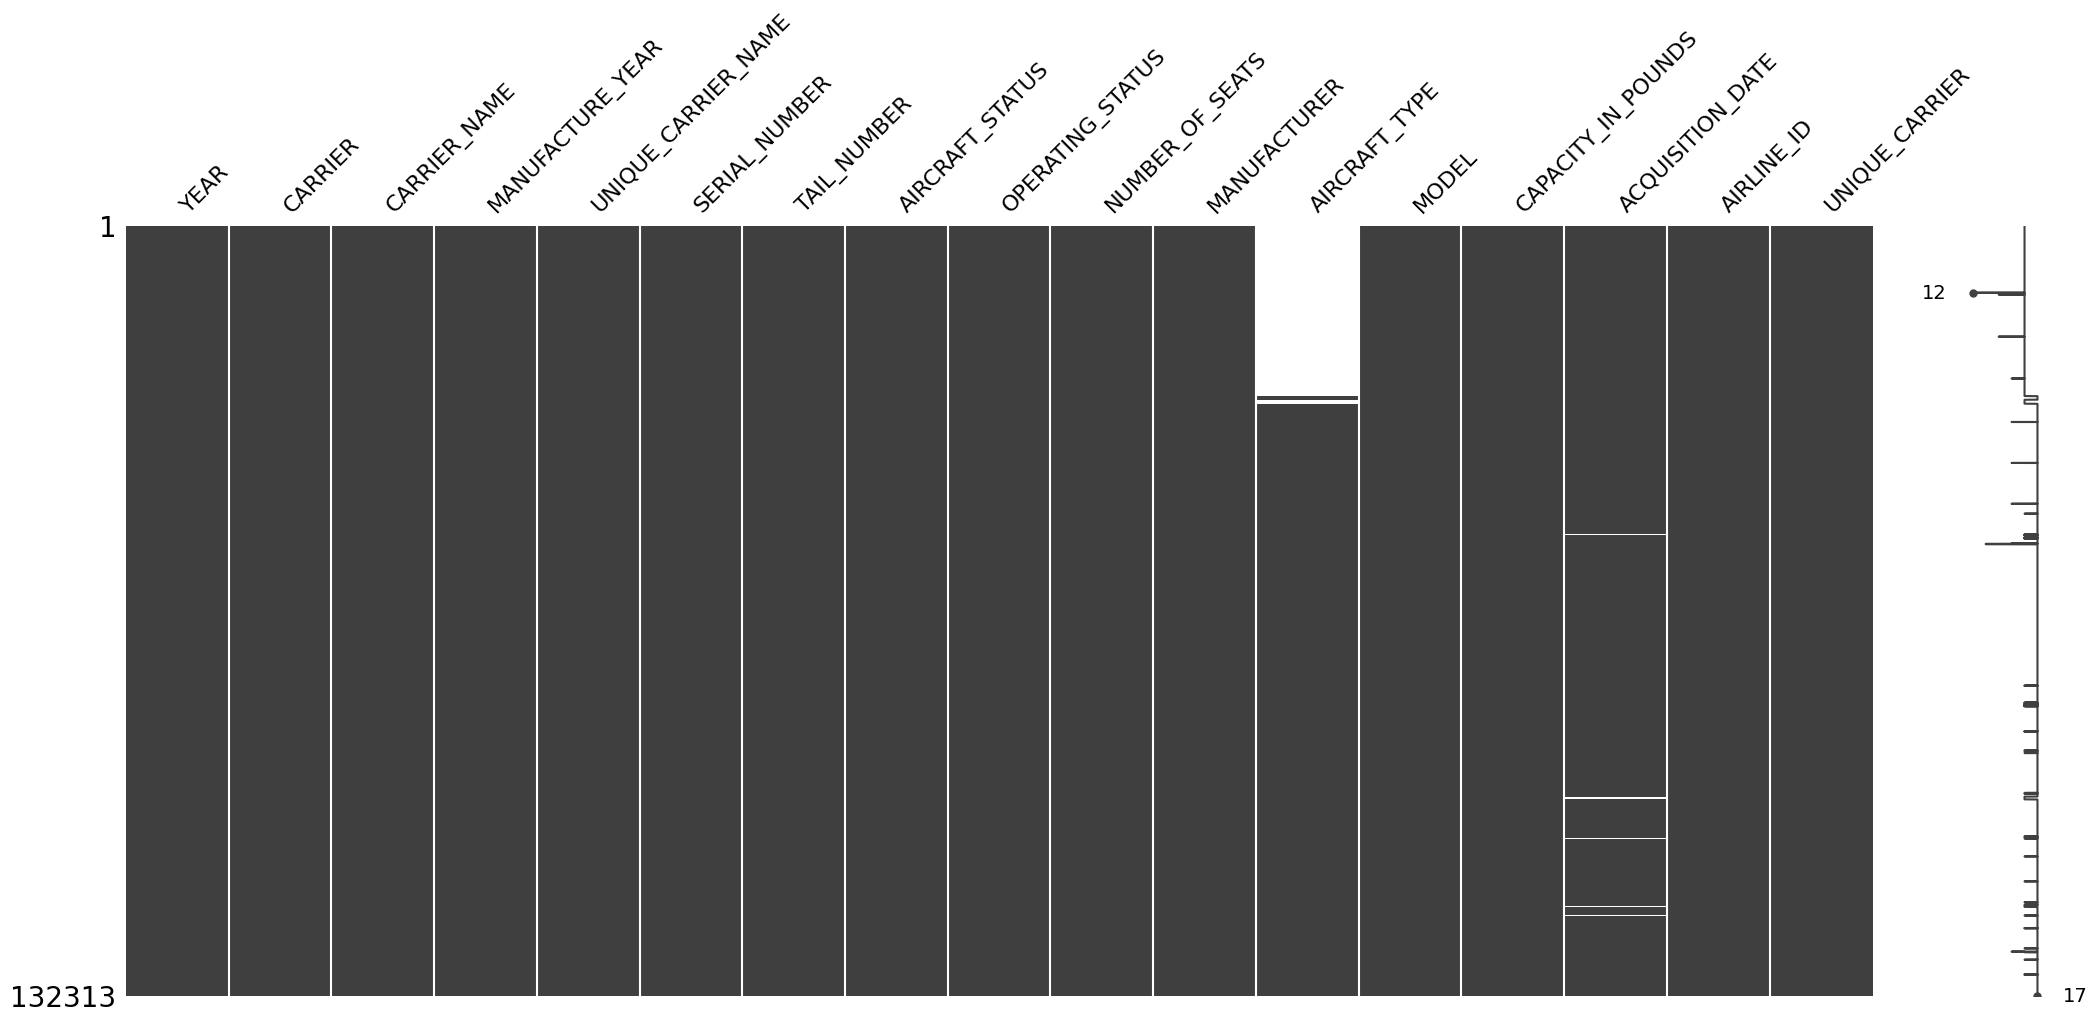

In [ ]:
import missingno as msno
msno.matrix(inventory)
### of the columns to investigate, number of seats and capacity make sense to be imputed since I believe they can be estimated using the model since the models of a plane typically have the same seats and capacity ###